<a href="https://colab.research.google.com/github/mustaphamerakech/tpMachineLearning/blob/main/Copie_de_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the "Heart Disease" dataset from the UCI Machine Learning Repository

Data Exploration and Pre-processing:


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
 # Créer un dataframe avec X et y
df = pd.DataFrame(data=X, columns=heart_disease.data.feature_names)
df['target'] = y
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [ ]:
# Impute missing values
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Scale numerical features
scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [ ]:
df['sex'].value_counts()

1    206
0     97
Name: sex, dtype: int64

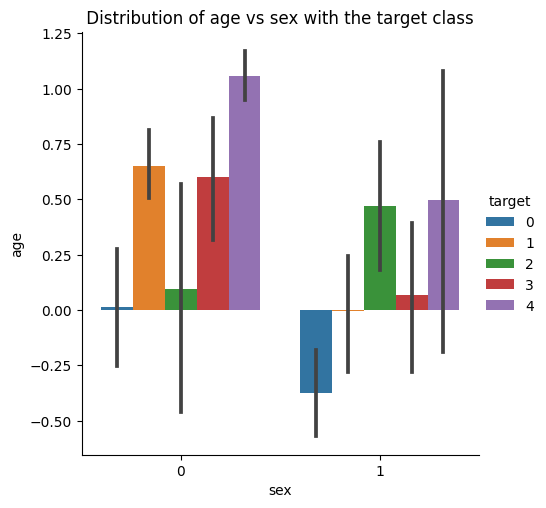

In [ ]:
sns.catplot(kind='bar', data = df, y='age', x= 'sex', hue= 'target')
plt.title(" Distribution of age vs sex with the target class ")
plt.show()

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3.030000e+02,303.000000,303.000000,3.030000e+02,3.030000e+02,303.000000,303.000000,3.030000e+02,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000
mean,-1.465641e-18,0.679868,3.158416,4.426236e-16,2.345026e-16,0.148515,0.990099,-1.172513e-16,0.326733,2.345026e-17,1.600660,0.663366,4.722772,0.937294
std,1.001654e+00,0.467299,0.960126,1.001654e+00,1.001654e+00,0.356198,0.994971,1.001654e+00,0.469794,1.001654e+00,0.616226,0.934375,1.938383,1.228536
min,-2.819115e+00,0.000000,1.000000,-2.145037e+00,-2.334877e+00,0.000000,0.000000,-3.442067e+00,0.000000,-8.968617e-01,1.000000,0.000000,3.000000,0.000000
25%,-7.135564e-01,0.000000,3.000000,-6.652997e-01,-6.905030e-01,0.000000,0.000000,-7.053073e-01,0.000000,-8.968617e-01,1.000000,0.000000,3.000000,0.000000
50%,1.729945e-01,1.000000,3.000000,-9.616980e-02,-1.101357e-01,0.000000,1.000000,1.485618e-01,0.000000,-2.067053e-01,2.000000,0.000000,3.000000,0.000000
75%,7.270888e-01,1.000000,4.000000,4.729601e-01,5.476139e-01,0.000000,2.000000,7.178079e-01,1.000000,4.834512e-01,2.000000,1.000000,7.000000,2.000000
max,2.500191e+00,1.000000,4.000000,3.887739e+00,6.138485e+00,1.000000,2.000000,2.294182e+00,1.000000,4.451851e+00,3.000000,3.000000,7.000000,4.000000


In [ ]:
# Step 2: Train a Decision Tree Model
# Split the dataset into training and testing sets
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Implement a decision tree model
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, y_train)
# Prune the decision tree model
pruned_dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
pruned_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Evaluate model performance on training set
y_pred_train = pruned_dt_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print("\nEvaluation on Training Set:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
print("Confusion Matrix:")
print(conf_matrix_train)


Evaluation on Training Set:
Accuracy: 0.7520661157024794
Precision: 0.7718588900256783
Recall: 0.7520661157024794
F1 Score: 0.7358022764285354
Confusion Matrix:
[[128   7   0   0   0]
 [ 10  30   3   0   0]
 [  5  10  12   0   0]
 [  3  10   4  11   0]
 [  0   1   5   2   1]]


In [ ]:
# # Step 3: Model Evaluation
# # Evaluate model performance
y_pred_test = pruned_dt_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Evaluation on Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print("Confusion Matrix:")
print(conf_matrix_test)

Evaluation on Test Set:
Accuracy: 0.5573770491803278
Precision: 0.47786885245901645
Recall: 0.5573770491803278
F1 Score: 0.5118559718969555
Confusion Matrix:
[[26  2  1  0  0]
 [ 5  5  2  0  0]
 [ 2  2  3  2  0]
 [ 1  6  0  0  0]
 [ 1  1  1  1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


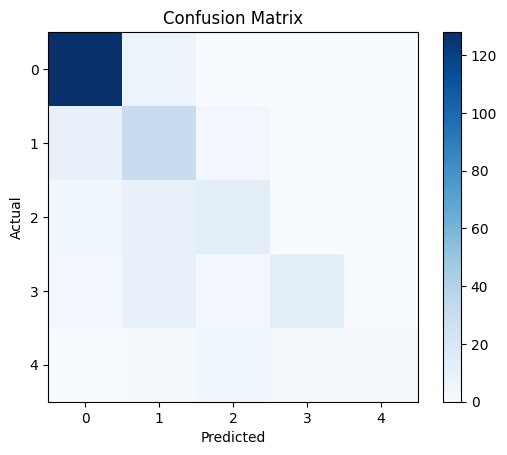

In [ ]:
# Visualize the confusion matrix train
plt.imshow(conf_matrix_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

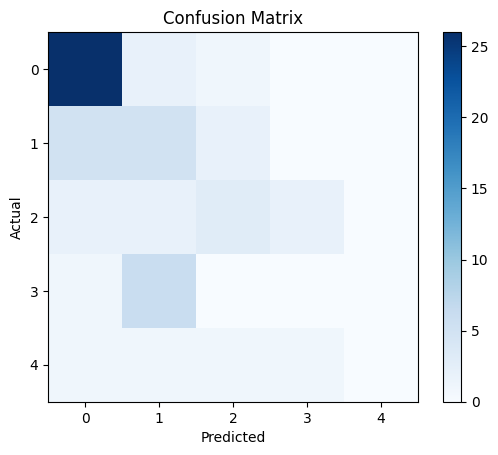

In [ ]:
# Visualize the confusion matrix
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

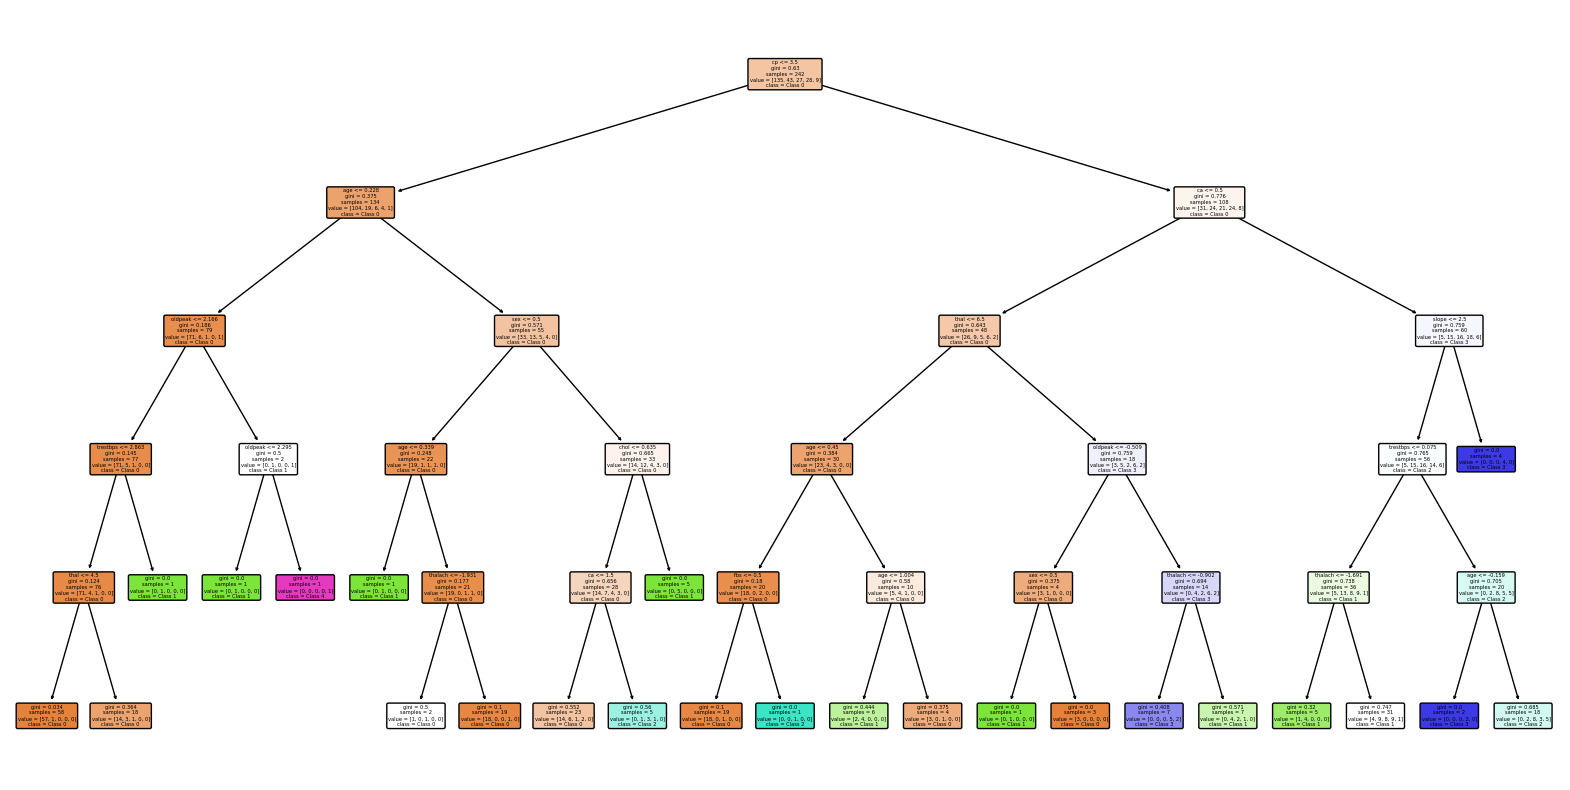

In [ ]:
# Step 4: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(pruned_dt_model, feature_names=X.columns, class_names=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], filled=True, rounded=True)
plt.show()


In [ ]:
# Step 5: Feature Importance Analysis
feature_importance = pruned_dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
     Feature  Importance
2         cp    0.245035
0        age    0.150612
11        ca    0.134754
12      thal    0.087390
9    oldpeak    0.078986
1        sex    0.072650
7    thalach    0.072426
3   trestbps    0.051806
4       chol    0.047423
10     slope    0.036342
5        fbs    0.022575
6    restecg    0.000000
8      exang    0.000000


In [ ]:

# Step 6: Bonus - Prediction for New Patients

new_patient_data_dict = {
    'age': [67.0],
    'sex': [1.0],
    'cp': [4.0],
    'trestbps': [160.0],
    'chol': [286.0],
    'fbs': [0.0],
    'restecg': [2.0],
    'thalach': [108.0],
    'exang': [1.0],
    'oldpeak': [1.5],
    'slope': [2.0],
    'ca': [3.0],
    'thal': [3.0]
}

# Create a DataFrame for new patient data
new_patient_data = pd.DataFrame(new_patient_data_dict)


# Ensure that the new_patient_data has the same columns as the training data
missing_cols = set(X.columns) - set(new_patient_data.columns)
for col in missing_cols:
    new_patient_data[col] = 0

# Ensure the order of columns is the same
new_patient_data = new_patient_data[X.columns]

# Scale numerical features
new_patient_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.transform(new_patient_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

# Use the trained decision tree model to predict whether the new patient has heart disease
new_patient_prediction = pruned_dt_model.predict(new_patient_data)

print("Prediction for New Patient:")
print(new_patient_prediction)

Prediction for New Patient:
[2]
